# Magic functions

IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented:  
  
- **Line magics** are prefixed with the `%` character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes.  
  
- **Cell magics** are prefixed with a double `%%`, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

In [1]:
%magic

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

### Line magics:

In [3]:
%timeit [n**2 for n in range(10**3)]

1000 loops, best of 3: 540 µs per loop


In [4]:
%timeit map(lambda x: x**2, range(10**3))

The slowest run took 4.61 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 746 ns per loop


In [5]:
!cat example_script.py

print("Running script...")
x = 12
print("'x' is now equal to {0:d}.".format(x))

In [6]:
%run example_script.py

Running script...
'x' is now equal to 12.


In [7]:
x

12

### Cell magics:

In [8]:
%%timeit -n 15 -r 5

N = 10**3
[n**2 for n in range(N)]
[n**3 for n in range(N)]

15 loops, best of 5: 1.03 ms per loop


#### Cell magics examples:

In [9]:
%%bash

FILES=`ls -1 | grep "ipynb"`

echo -e "Ipython notebook files:\n" 
for F in $FILES; do
    echo $F
done

Ipython notebook files:

display.ipynb
enviroment.ipynb
export.ipynb
index.ipynb
installation.ipynb
magics.ipynb
parallel.ipynb
references.ipynb
use_of_ipython.ipynb


Another interesting cell magic: creates any file you want locally from the notebook:

In [10]:
%%writefile example_file.txt
My favorite number is 42!

Overwriting example_file.txt


In [11]:
!cat example_file.txt

My favorite number is 42!

#### Running code in other languages with special `%%` magics

In [12]:
# Python
fibonacci = lambda n: 1 if n <= 2 else fibonacci(n - 1) + fibonacci(n - 2)

fibonacci(10)

55

#### Perl

In [13]:
%%perl

sub fibonacci {
    $a = 0;
    $b = 1;
    $n = $_[0];

    for ($i=0; $i<$n; $i++){
        printf "%d\n", $a;
        $sum = $a + $b;
        $a = $b;
        $b = $sum;
      }
      printf "%d\n", $a;
}

fibonacci(10)

0
1
1
2
3
5
8
13
21
34
55


#### Ruby

In [14]:
%%ruby

def fibSeq(n)
    a = [0]
    (n+1).times do |i|
        if i==0
            a[i] = 0
        elsif i==1
            a[i] = 1
        else
            a[i] = a[i-1] + a[i-2]
        end  
    end
    return a[0..n]
end

puts fibSeq(10)

0
1
1
2
3
5
8
13
21
34
55


#### R

In [15]:
# First import the R extension
%reload_ext rpy2.ipython 

In [16]:
%%R

recfibo <- function(n) {
    if ( n < 2 ) n
    else Recall(n-1) + Recall(n-2)
}
 
print.table(lapply(0:10, recfibo))

 [1] 0  1  1  2  3  5  8  13 21 34 55


#### Push variables  to R

In [17]:
import numpy as np

BMI = np.random.normal(24.2, 2.2, 1000)

%Rpush BMI

#### Display plots created in R  

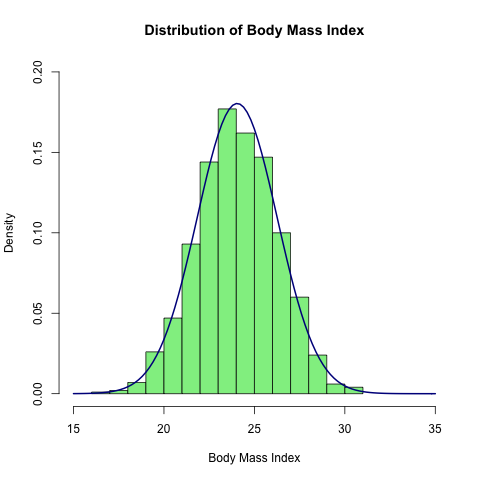

In [18]:
%%R

hist(BMI, freq=FALSE, xlab="Body Mass Index", 
     main="Distribution of Body Mass Index", 
     col="lightgreen", 
     xlim=c(15, 35), ylim=c(0, .20))

smoothing = curve(dnorm(x, mean=mean(BMI), sd=sd(BMI)), add=TRUE, col="darkblue", lwd=2) 

#### Pull variables  from R

In [19]:
%Rpull smoothing
print(smoothing)

$x
  [1] 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8
 [16] 18.0 18.2 18.4 18.6 18.8 19.0 19.2 19.4 19.6 19.8 20.0 20.2 20.4 20.6 20.8
 [31] 21.0 21.2 21.4 21.6 21.8 22.0 22.2 22.4 22.6 22.8 23.0 23.2 23.4 23.6 23.8
 [46] 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8
 [61] 27.0 27.2 27.4 27.6 27.8 28.0 28.2 28.4 28.6 28.8 29.0 29.2 29.4 29.6 29.8
 [76] 30.0 30.2 30.4 30.6 30.8 31.0 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8
 [91] 33.0 33.2 33.4 33.6 33.8 34.0 34.2 34.4 34.6 34.8 35.0

$y
  [1] 4.174780e-05 6.019590e-05 8.608910e-05 1.221174e-04 1.718124e-04
  [6] 2.397617e-04 3.318584e-04 4.555898e-04 6.203589e-04 8.378380e-04
 [11] 1.122342e-03 1.491207e-03 1.965165e-03 2.568667e-03 3.330157e-03
 [16] 4.282226e-03 5.461631e-03 6.909127e-03 8.669058e-03 1.078869e-02
 [21] 1.331721e-02 1.630444e-02 1.979915e-02 2.384708e-02 2.848864e-02
 [26] 3.375641e-02 3.967243e-02 4.624547e-02 5.346846e-02 6.131603e-02
 [31] 6.974265e-02 7

#### Debug

In [20]:
def division(n, m):
    return n / m

In [21]:
division(0, 2)
division(2, 0)

ZeroDivisionError: division by zero

In [22]:
%debug

> <ipython-input-20-f84a441881eb>(2)division()
      1 def division(n, m):
----> 2     return n / m

ipdb> n


#### Speed up the execution with Cython

In [23]:
# Cpython
%load_ext Cython

In [24]:
def squareP(x):
    return x * x

In [25]:
%%cython

def squareC1(x):
    return x * x

In [26]:
%%cython

def squareC2(int x):
    return x * x

In [27]:
%timeit(squareP(32323213))

The slowest run took 15.75 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 153 ns per loop


In [28]:
%timeit(squareC1(32323213))

The slowest run took 21.67 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 95.3 ns per loop


In [29]:
%timeit(squareC2(32323213))

The slowest run took 19.83 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 83.4 ns per loop
